In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
df=pd.read_csv('https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv?raw=true')
df['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [4]:
# Uso 70% para entrenamiento (random split)
train_df= df.sample(frac=0.7,random_state=200)
rest_df = df.drop(train_df.index)
# Uso 15% para validacion y 15% para test
val_df=rest_df.sample(frac=0.5,random_state=200)
test_df=rest_df.drop(val_df.index)

In [5]:
input = train_df[['age', 'bmi']].values
output = train_df['charges'].values

In [6]:
x_inflated = np.hstack((np.ones((input.shape[0],1)),input))

In [7]:
records = x_inflated.shape[0]
features = x_inflated.shape[1]
random.seed(42)
theta = np.random.rand(features,1)
theta


array([[0.95840509],
       [0.13304742],
       [0.2956378 ]])

In [8]:
y_est = x_inflated @ theta
y_est

array([[16.95293026],
       [13.30907993],
       [14.33650454],
       [13.9107653 ],
       [10.98966611],
       [14.31258289],
       [20.99732816],
       [13.99031687],
       [15.69779168],
       [14.26993399],
       [17.30765398],
       [16.45040846],
       [15.11844569],
       [12.84494941],
       [18.4844069 ],
       [14.00671227],
       [18.7298175 ],
       [14.24751135],
       [17.78065363],
       [16.18713469],
       [16.90259897],
       [13.27191703],
       [16.62768705],
       [17.01494133],
       [13.44500046],
       [ 9.91790624],
       [10.21208667],
       [14.94263488],
       [14.16209906],
       [19.83107869],
       [21.69793769],
       [18.37198127],
       [13.49382233],
       [10.79901096],
       [14.6702734 ],
       [14.89813308],
       [17.24860969],
       [ 9.52470798],
       [18.05282776],
       [11.44785265],
       [14.15144988],
       [19.59884689],
       [14.63775324],
       [17.75705465],
       [17.24865132],
       [16

In [9]:
def cost_function(x, y , theta):
    n = x.shape[0]
    y_est = x.dot(theta)
    return np.sqrt(1/n*(np.sum(np.power(y_est - y, 2)))), y_est[-1]

In [10]:
def fit_model(x, y, theta, alpha=0.02, steps=100):
    cost_history = []
    y_est_history = []
    for step in range(steps):
        # ∇J(θ) = (1/n) * Xᵀ (Xθ - y)
        gradient = (1/len(y)) * (x.T @ (x @ theta - y))
        theta = theta - alpha * gradient
        cost, y_est = cost_function(x, y, theta)
        cost_history.append(cost)
        y_est_history.append(y_est)
    return cost_history, y_est_history

In [11]:
cost_history, y_est_history = fit_model(x_inflated, output, theta, alpha=0.0006, steps=30)

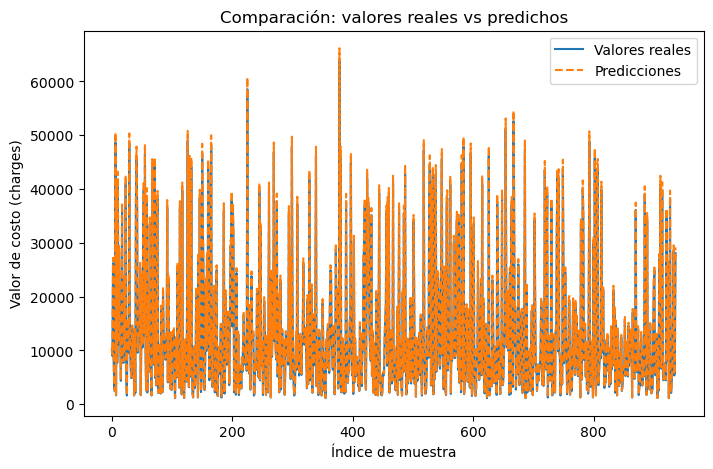

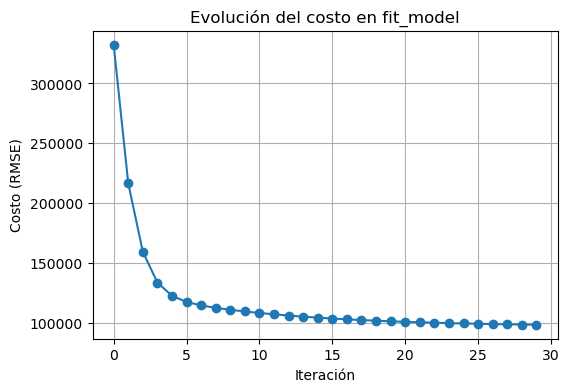

In [17]:
# 1) Prepara la predicción final
y_est_final = y_est_history[-1].flatten()   # array de predicciones de tamaño n

# 2) Gráfica: reales vs predichos
plt.figure(figsize=(8,5))
plt.plot(output.flatten(),       label='Valores reales')
plt.plot(y_est_final,            label='Predicciones', linestyle='--')
plt.xlabel('Índice de muestra')
plt.ylabel('Valor de costo (charges)')
plt.title('Comparación: valores reales vs predichos')
plt.legend()
plt.show()

# 3) (Opcional) Gráfica de la evolución del costo durante el entrenamiento
plt.figure(figsize=(6,4))
plt.plot(cost_history, marker='o')
plt.xlabel('Iteración')
plt.ylabel('Costo (RMSE)')
plt.title('Evolución del costo en fit_model')
plt.grid(True)
plt.show()


In [19]:
# 1) Prepara vectores 1-D
y_true = output.flatten()
y_pred = y_est_history[-1].flatten()
errors = y_pred - y_true
idx = np.arange(len(errors))

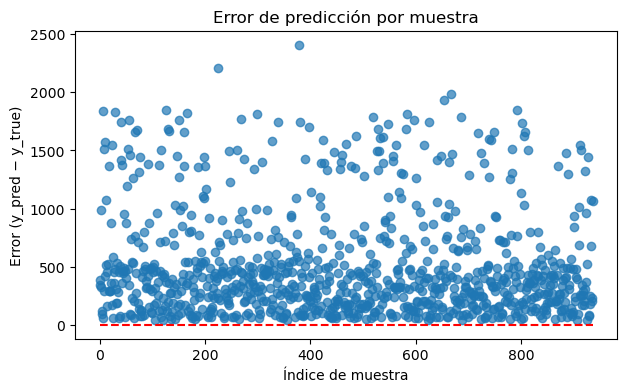

In [21]:
plt.figure(figsize=(7,4))
plt.plot(idx, errors, marker='o', linestyle='', alpha=0.7)
plt.hlines(0, xmin=0, xmax=len(errors)-1, colors='r', linestyles='--')
plt.xlabel('Índice de muestra')
plt.ylabel('Error (y_pred − y_true)')
plt.title('Error de predicción por muestra')
plt.show()

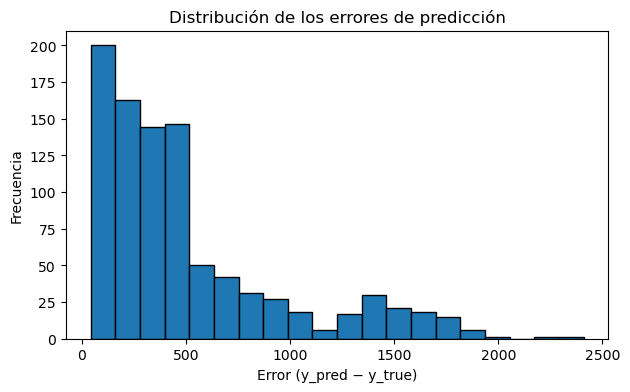

In [22]:
# b) Histograma de los errores
plt.figure(figsize=(7,4))
plt.hist(errors, bins=20, edgecolor='k')
plt.xlabel('Error (y_pred − y_true)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los errores de predicción')
plt.show()

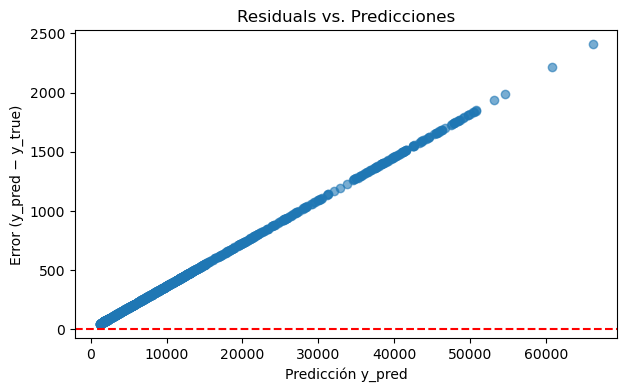

In [23]:
plt.figure(figsize=(7,4))
plt.scatter(y_pred, errors, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicción y_pred')
plt.ylabel('Error (y_pred − y_true)')
plt.title('Residuals vs. Predicciones')
plt.show()